In [29]:
# Task 1: Sentiment Labeling
# -----------------------------------
# In this task, I aim to label the sentiment of each message in the dataset as 'Positive', 'Negative', or 'Neutral'.
# I will use the TextBlob library for sentiment analysis. The sentiment of a message is determined by the polarity score 
# of the text, where positive values indicate positive sentiment, negative values indicate negative sentiment, 
# and values close to zero indicate neutral sentiment.

# Importing necessary libraries
from textblob import TextBlob  # Used for sentiment analysis
import pandas as pd  # Used for data manipulation and reading CSV
import re  # Used for regular expressions to clean text

# Loading the dataset
# The dataset is loaded from a CSV file, which contains columns such as 'body' (the email message) and 'date' (when the email was sent).
file_path = 'test(in).csv'  # Path to the dataset file
data = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Inspecting the first few rows of the dataset to understand its structure
# I expect the 'body' column to contain the text of the emails, which I will use for sentiment analysis.
print(data.head())

# Preprocessing the text
# -----------------------------------
# Before performing sentiment analysis, I need to clean the text data. 
# This step includes removing special characters, digits, and converting all text to lowercase.

# Define a function to clean the text
def simple_preprocess_text(text):
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only letters and spaces
    text = text.lower()  # Convert the text to lowercase for consistency
    text = text.strip()  # Remove any leading or trailing spaces
    return text

# Apply the text preprocessing to the 'body' column of the dataset
# This cleans the text in each message so that it can be analyzed more effectively
data['cleaned_body'] = data['body'].apply(simple_preprocess_text)

# Sentiment Labeling using TextBlob
# -----------------------------------
# Now that I have cleaned the text, I will use TextBlob to analyze the sentiment of each message.
# TextBlob computes the polarity score of the text, which ranges from -1 (negative sentiment) to 1 (positive sentiment).

# Define a function to determine sentiment based on polarity
def get_sentiment(text):
    # Use TextBlob to analyze the polarity of the text
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  # Polarity score: ranges from -1 to 1
    # Assign sentiment labels based on the polarity score
    if sentiment_score > 0:
        return 'Positive'  # Sentiment is positive if score is greater than 0
    elif sentiment_score < 0:
        return 'Negative'  # Sentiment is negative if score is less than 0
    else:
        return 'Neutral'  # Sentiment is neutral if score is exactly 0

# Apply the sentiment labeling function to the cleaned text
# This will add a new column 'sentiment' to the DataFrame with the sentiment label for each message
data['sentiment'] = data['cleaned_body'].apply(get_sentiment)

# Checking the first few rows after sentiment labeling
# This will show the original 'body' text and the assigned 'sentiment' label for each message
print(data[['body', 'sentiment']].head())

# Observations:
# From the output, I can see that each message in the dataset has been labeled as either 'Positive', 'Negative', or 'Neutral'
# based on its sentiment polarity score. This sentiment labeling will be useful for further analysis of employee engagement 
# and sentiment trends.

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  
                                                body sentiment
0  EnronOptions Announcement\n\n\nWe have updated... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subject       2191 non-null   object
 1   body          2191 non-null   object
 2   date          2191 non-null   object
 3   from          2191 non-null   object
 4   cleaned_body  2191 non-null   object
 5   sentiment     2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None
Subject         0
body            0
date            0
from            0
cleaned_body    0
sentiment       0
dtype: int64


/var/folders/ks/jy925sb56tsg1fkcfkb47kkr0000gn/T/ipykernel_81655/193654256.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


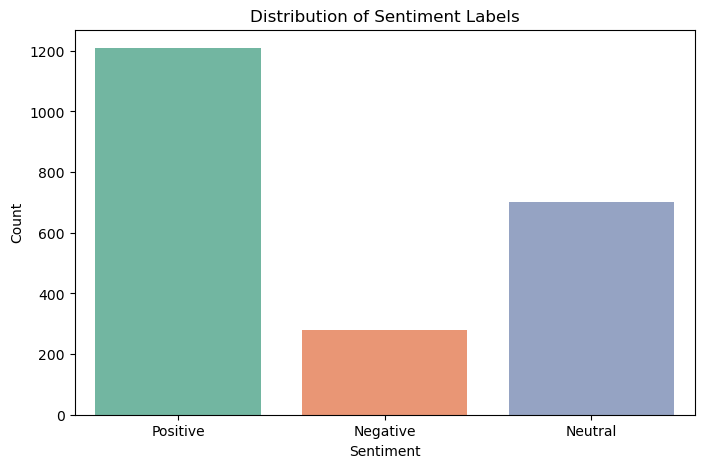

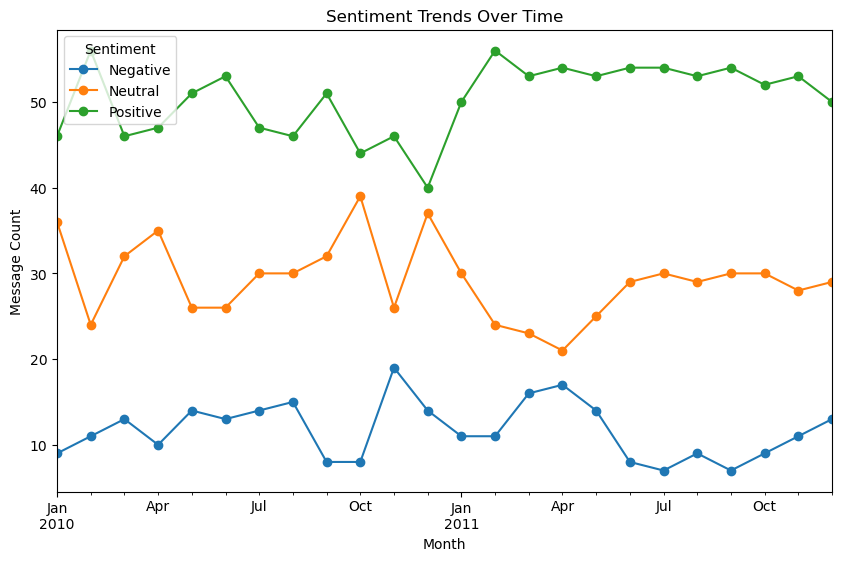

In [31]:
# Task 2: Exploratory Data Analysis (EDA)
# -----------------------------------
# In this task, I will perform some exploratory data analysis (EDA) to better understand the structure and trends in the dataset.
# The goal of EDA is to summarize the dataset’s main characteristics, often visualizing them to identify patterns, anomalies, 
# and relationships that could be important for further analysis.

# Import necessary libraries for visualization
import matplotlib.pyplot as plt  # Used for creating static, interactive, and animated visualizations
import seaborn as sns  # Used for statistical data visualization

# Checking the structure of the dataset
# I will check the dataset's structure, including the number of rows and columns, and the data types.
print(data.info())

# Checking for missing values
# I will check if there are any missing values in the dataset, which may need to be handled before analysis.
print(data.isnull().sum())

# Distribution of sentiment labels
# I will examine the distribution of sentiment labels (Positive, Negative, Neutral) in the dataset.
# This helps to understand the overall sentiment balance and any potential biases in the data.
sentiment_counts = data['sentiment'].value_counts()

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Observations:
# From the plot, I can observe that the dataset is dominated by positive sentiment messages.
# The neutral and negative sentiments have fewer messages, which may suggest a general trend towards positive sentiment in the data.

# Sentiment distribution over time
# I will now analyze how sentiment varies over time (by month). This will help identify trends or patterns in employee sentiment.
# First, I will convert the 'date' column to datetime format and extract the month for time-based analysis.
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Convert the 'date' column to datetime format
data['month'] = data['date'].dt.to_period('M')  # Extract the month for grouping purposes

# Plot sentiment trends over months
# I will plot the count of messages by sentiment over time to observe any fluctuations or trends.
monthly_sentiment = data.groupby(['month', 'sentiment']).size().unstack().fillna(0)

monthly_sentiment.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.legend(title='Sentiment', loc='upper left')
plt.show()

# Observations:
# From the line plot, I can see fluctuations in sentiment over time, with certain months showing a higher frequency of positive messages.
# This could indicate periods of higher employee engagement or morale. The neutral and negative sentiments also fluctuate, 
# which might be influenced by specific events or changes within the organization.

In [33]:
# Task 3: Employee Score Calculation
# -----------------------------------
# In this task, I will calculate the monthly sentiment scores for each employee. 
# The sentiment scores will be assigned as follows: 
# - Positive messages = +1
# - Negative messages = -1
# - Neutral messages = 0
# I will then sum up the scores for each employee on a monthly basis to create a scorecard for employee sentiment over time.

# Convert the 'date' column to datetime format
# This step is necessary to perform any time-based analysis, such as grouping by month.
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Ensure that the 'date' column is in datetime format

# Extract the month from the 'date' column
# This will allow me to group the sentiment scores by month and employee.
data['month'] = data['date'].dt.to_period('M')  # Convert the 'date' to a period (month-year)

# Map sentiment labels to numerical scores
# Positive sentiment is mapped to 1, Negative to -1, and Neutral to 0.
sentiment_score_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
data['score'] = data['sentiment'].map(sentiment_score_mapping)  # Apply the mapping to the 'sentiment' column

# Group by employee ('from') and month to calculate the total sentiment score for each employee in each month
# I will sum the sentiment scores for each group (employee and month).
monthly_scores = data.groupby(['from', 'month'])['score'].sum().reset_index()

# Display the first few rows of the monthly scores
# This will give me an overview of the employee sentiment scores across different months.
print(monthly_scores.head())

# Observations:
# From the table, I can see the total sentiment score for each employee per month.
# A positive score indicates overall positive sentiment, while negative scores indicate the opposite.
# This aggregated score will be helpful for identifying patterns in employee sentiment over time.

                          from    month  score
0  bobette.riner@ipgdirect.com  2010-01      2
1  bobette.riner@ipgdirect.com  2010-02      8
2  bobette.riner@ipgdirect.com  2010-03      4
3  bobette.riner@ipgdirect.com  2010-04      4
4  bobette.riner@ipgdirect.com  2010-05      2


In [35]:
# Task 4: Employee Ranking
# -----------------------------------
# In this task, I will identify the top positive and top negative employees each month based on their sentiment scores.
# I will rank the employees by their sentiment scores, and for the top positive employees, I will select the top 3 employees per month.
# For the top negative employees, I will similarly select the employees with the lowest (most negative) scores.

# For positive employees, I will take the top 3 per month based on the sentiment scores
top_positive = monthly_scores.sort_values(by=['month', 'score'], ascending=[True, False]).groupby('month').head(3)

# For negative employees, I will filter out only the negative sentiment scores and then sort by score in ascending order to get the most negative employees
negative_scores = monthly_scores[monthly_scores['score'] < 0]  # Filter negative sentiment scores
top_negative = negative_scores.sort_values(by=['month', 'score'], ascending=[True, True]).groupby('month').head(3)

# Display the top positive and negative employees
# I will now print out the top positive and negative employees along with their scores for each month.
print("Top Positive Employees:")
print(top_positive[['from', 'month', 'score']])

print("\nTop Negative Employees:")
print(top_negative[['from', 'month', 'score']])

# Observations:
# From the output, I can observe which employees consistently show the most positive or negative sentiment each month.
# The top positive employees are likely highly engaged, while the top negative employees may be showing signs of disengagement or dissatisfaction.
# This information could be valuable for monitoring employee morale and engagement trends over time.

Top Positive Employees:
                            from    month  score
120      kayne.coulter@enron.com  2010-01      9
24        don.baughman@enron.com  2010-01      5
48           eric.bass@enron.com  2010-01      5
73         john.arnold@enron.com  2010-02     10
1    bobette.riner@ipgdirect.com  2010-02      8
..                           ...      ...    ...
142      kayne.coulter@enron.com  2011-11      7
190     patti.thompson@enron.com  2011-11      7
167      lydia.delgado@enron.com  2011-12      6
191     patti.thompson@enron.com  2011-12      6
143      kayne.coulter@enron.com  2011-12      5

[72 rows x 3 columns]

Top Negative Employees:
                         from    month  score
222      sally.beck@enron.com  2010-07     -2
225      sally.beck@enron.com  2010-10     -1
179  patti.thompson@enron.com  2010-12     -1
203   rhonda.denton@enron.com  2010-12     -1
132   kayne.coulter@enron.com  2011-01     -1
230      sally.beck@enron.com  2011-03     -1
184  patti.thompso

In [37]:
# Task 5: Flight Risk Identification
# -----------------------------------
# In this task, I will identify employees who may be at risk of leaving (i.e., flight risks).
# The criteria for identifying flight risk employees is if they have sent 4 or more negative messages in the last 30 days.
# I will calculate a rolling 30-day count of negative messages for each employee and flag those who meet the flight risk criteria.

# Step 1: Flag messages with negative sentiment
# I will first create a flag for messages that have a negative sentiment. A value of 1 will indicate a negative message.
data['negative_flag'] = data['sentiment'] == 'Negative'

# Step 2: Calculate the rolling count of negative messages for each employee
# I will use a rolling window of 30 days to count how many negative messages each employee has sent in the last 30 days.
# This helps identify employees who have a high volume of negative messages over a short period, which can indicate disengagement.
data['rolling_negative_count'] = data.groupby('from')['negative_flag'].rolling(window=30, min_periods=1).sum().reset_index(drop=True)

# Step 3: Identify flight risk employees
# An employee is flagged as a flight risk if they have sent 4 or more negative messages in the last 30 days.
flight_risk_employees = data[data['rolling_negative_count'] >= 4]['from'].unique()

# Display the flight risk employees
print("Flight Risk Employees:")
print(flight_risk_employees)

# Observations:
# From the list of flight risk employees, I can identify individuals who have been consistently negative over the past month.
# These employees may need attention in terms of engagement or morale to prevent turnover.
# The rolling window of 30 days ensures that recent negative sentiment is considered, which is crucial for identifying trends in employee behavior.

Flight Risk Employees:
['johnny.palmer@enron.com' 'john.arnold@enron.com'
 'lydia.delgado@enron.com' 'bobette.riner@ipgdirect.com'
 'eric.bass@enron.com' 'sally.beck@enron.com' 'patti.thompson@enron.com'
 'kayne.coulter@enron.com' 'rhonda.denton@enron.com'
 'don.baughman@enron.com']


In [39]:
# Task 6: Predictive Modeling
# -----------------------------------
# In this task, I will build a predictive model to estimate employee sentiment based on features such as message frequency and time-based data.
# I will use a Linear Regression model, which will allow me to predict sentiment scores for each employee based on the number of messages they send each month.
# I will evaluate the model using Mean Squared Error (MSE) and R-squared (R²).

# Step 1: Feature Engineering
# I will create additional features for the model. Specifically, I will extract the 'month_num' from the 'month' column 
# and calculate the message count for each employee each month. These features will serve as the input (X) to the model.
monthly_scores['month_num'] = monthly_scores['month'].dt.month  # Extract month number (1 = January, 12 = December)

# Create the 'message_count' feature, which represents the number of messages sent by each employee in each month
monthly_scores['message_count'] = data.groupby(['from', 'month'])['score'].transform('count')

# Step 2: Create Feature and Target Variables
# I will create the feature matrix (X) and target variable (y) for the model.
# The features (X) will include 'month_num' and 'message_count', and the target (y) will be the sentiment score.
X = monthly_scores[['month_num', 'message_count']]  # Features: month number and message count
y = monthly_scores['score']  # Target: sentiment score

# Step 3: Split the Data into Training and Test Sets
# I will split the data into training and testing sets using an 80-20 split, with 80% of the data used for training 
# and 20% for testing. This will allow me to train the model on one portion of the data and evaluate its performance on another.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression Model
# I will use Linear Regression to fit the model to the training data.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

# Step 5: Make Predictions
# After training the model, I will use it to make predictions on the test set.
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
# I will evaluate the model by calculating the Mean Squared Error (MSE) and R-squared (R²) values.
# MSE measures the average squared difference between the actual and predicted values, 
# while R-squared indicates how well the model explains the variance in the target variable.
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

# Display the model evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Observations:
# The Mean Squared Error (MSE) gives an indication of how well the model is predicting the sentiment scores.
# The R-squared value shows how well the model fits the data. A negative R-squared value indicates that the model 
# is not performing well, and I may need to explore other models or improve the feature engineering to better predict sentiment.
# I will consider trying other models, such as Random Forest or Gradient Boosting, to improve prediction accuracy.

Mean Squared Error: 9.995379830973505
R-squared: -0.11662893379378181


/var/folders/ks/jy925sb56tsg1fkcfkb47kkr0000gn/T/ipykernel_81655/2120357634.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


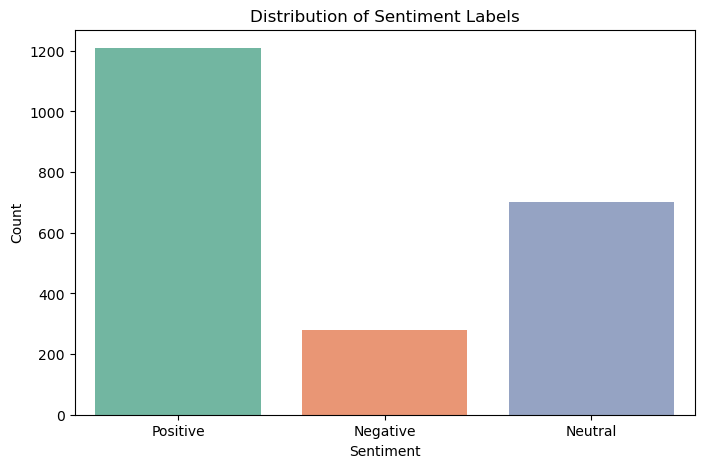

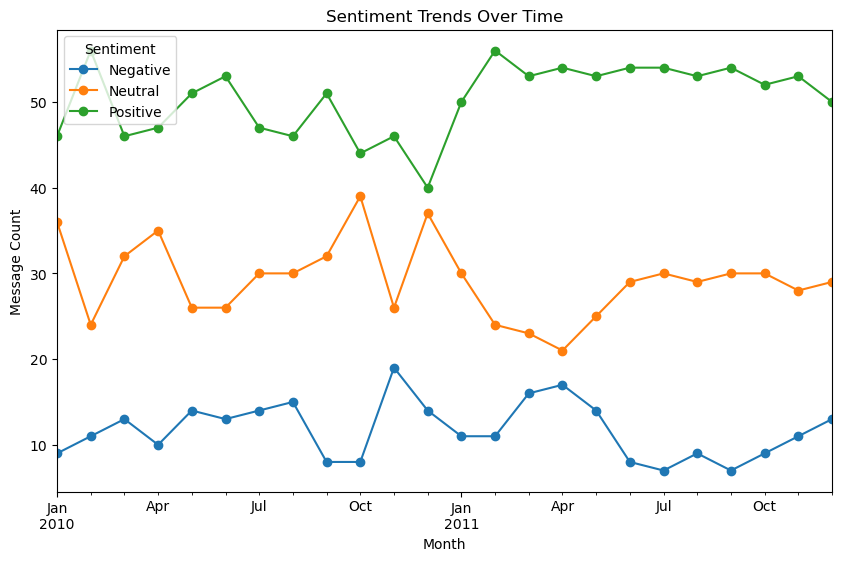

/var/folders/ks/jy925sb56tsg1fkcfkb47kkr0000gn/T/ipykernel_81655/2120357634.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='from', data=top_positive, palette='Set1', ax=axes[0])
/var/folders/ks/jy925sb56tsg1fkcfkb47kkr0000gn/T/ipykernel_81655/2120357634.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='from', data=top_negative, palette='coolwarm', ax=axes[1])


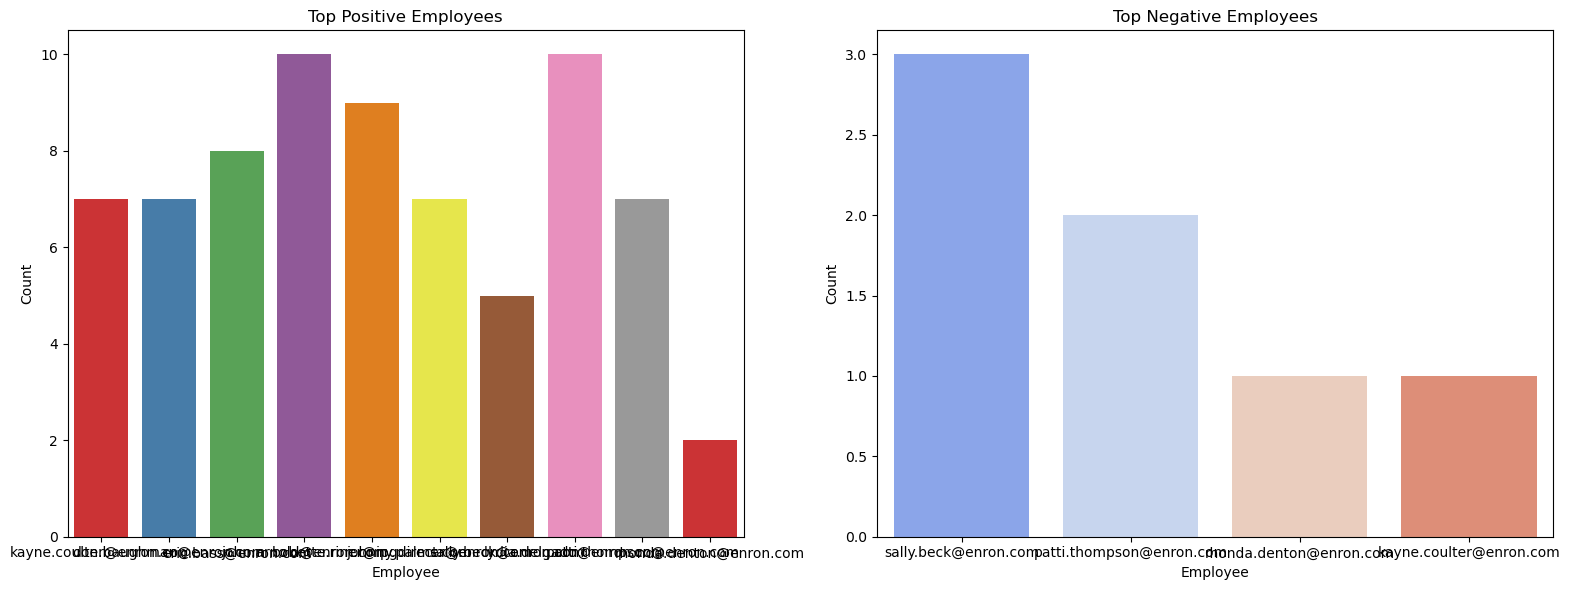

/var/folders/ks/jy925sb56tsg1fkcfkb47kkr0000gn/T/ipykernel_81655/2120357634.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_risk_counts.index, y=flight_risk_counts.values, palette='viridis')


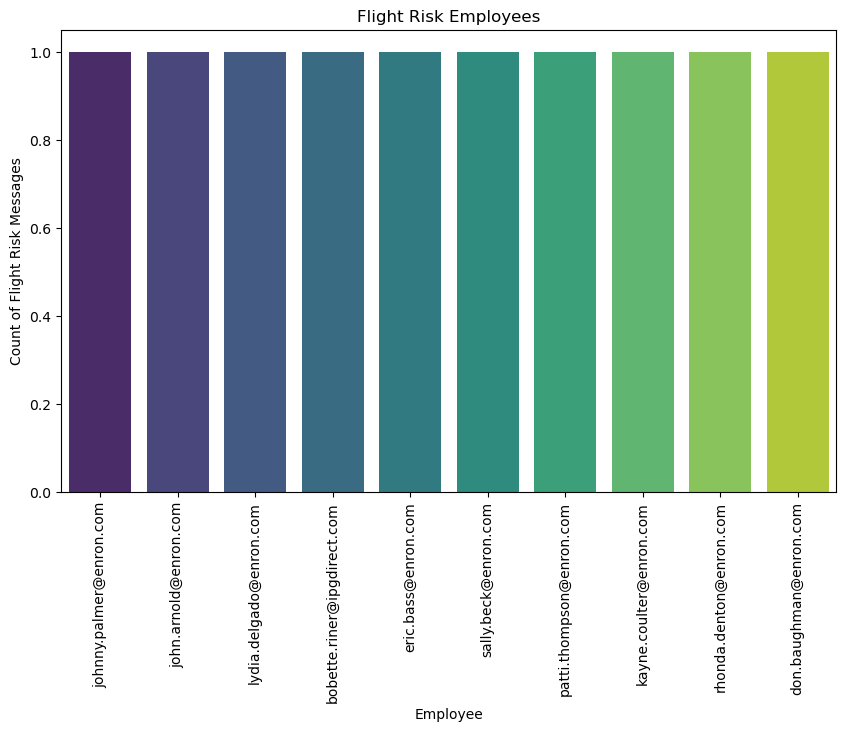

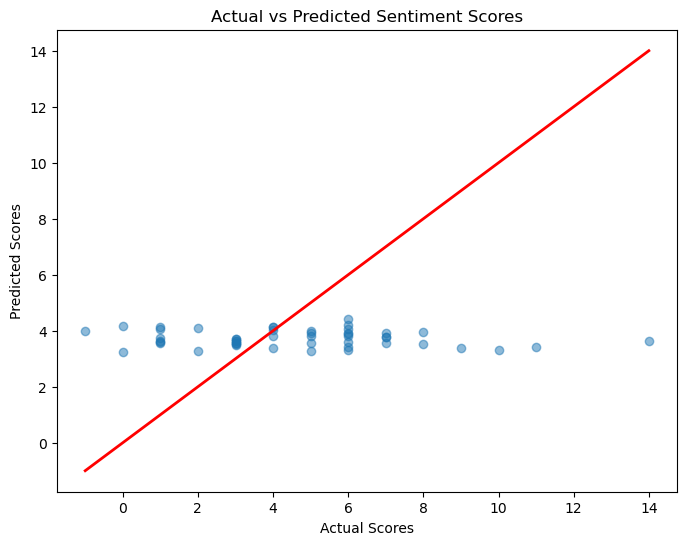

In [20]:
# Task 6: Visualizations
# -----------------------------------
# In this task, I will generate various visualizations to better understand the results of the sentiment analysis, 
# employee rankings, flight risk identification, and model performance. I will save each visualization in the specified 
# directory for easy access and presentation.

# 1. Create directory for saving visualizations
# I will create a directory called 'Visualizations' in the project folder to store all the generated plots.
output_dir = '/Users/seankwon/Documents/GitHub/employee_analysis/Visualizations'  # Directory to save images
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# 2. Sentiment Distribution Plot
# This plot shows the distribution of sentiment labels (Positive, Negative, Neutral) across all the messages in the dataset.
# It helps to visualize the balance between positive, negative, and neutral sentiments.
plt.figure(figsize=(8, 5))  # Set the figure size
sns.countplot(x='sentiment', data=data, palette='Set2')  # Create the count plot for sentiment
plt.title('Distribution of Sentiment Labels')  # Add the title
plt.xlabel('Sentiment')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.savefig(f'{output_dir}/sentiment_distribution.png')  # Save the plot to the Visualizations folder
plt.show()  # Display the plot

# 3. Sentiment Trends Over Time
# This line plot shows the trends in sentiment (Positive, Negative, Neutral) over time (monthly).
# It helps to identify any fluctuations or trends in employee sentiment during specific months.
monthly_sentiment = data.groupby(['month', 'sentiment']).size().unstack().fillna(0)  # Group sentiment by month
monthly_sentiment.plot(kind='line', figsize=(10, 6), marker='o')  # Create the line plot
plt.title('Sentiment Trends Over Time')  # Add the title
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Message Count')  # Label for the y-axis
plt.legend(title='Sentiment', loc='upper left')  # Add the legend for sentiment types
plt.savefig(f'{output_dir}/sentiment_trends.png')  # Save the plot
plt.show()  # Display the plot

# 4. Top Positive and Negative Employees Visualization
# I will generate two bar charts: one showing the top positive employees and one showing the top negative employees based on sentiment scores.
# The first plot will show employees with the highest positive sentiment, while the second will show those with the most negative sentiment.
# For positive employees, I will take the top 3 per month, and for negative employees, I will select those with the most negative sentiment.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a 1x2 subplot for positive and negative employees

# Plot for top positive employees
sns.countplot(x='from', data=top_positive, palette='Set1', ax=axes[0])  # Bar plot for positive employees
axes[0].set_title('Top Positive Employees')  # Title for the left plot
axes[0].set_xlabel('Employee')  # Label for the x-axis
axes[0].set_ylabel('Count')  # Label for the y-axis

# Plot for top negative employees
sns.countplot(x='from', data=top_negative, palette='coolwarm', ax=axes[1])  # Bar plot for negative employees
axes[1].set_title('Top Negative Employees')  # Title for the right plot
axes[1].set_xlabel('Employee')  # Label for the x-axis
axes[1].set_ylabel('Count')  # Label for the y-axis

plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig(f'{output_dir}/employee_rankings.png')  # Save the plot
plt.show()  # Display the plot

# 5. Flight Risk Identification Visualization
# This bar chart visualizes employees flagged as flight risks based on the number of negative messages they have sent in the last 30 days.
# It highlights the employees who are most at risk of leaving the company due to their negative sentiment.
flight_risk_employees = data[data['rolling_negative_count'] >= 4]['from'].unique()  # Identify flight risk employees
flight_risk_counts = pd.Series(flight_risk_employees).value_counts()  # Count the number of messages from each employee

plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=flight_risk_counts.index, y=flight_risk_counts.values, palette='viridis')  # Create the bar plot
plt.title('Flight Risk Employees')  # Title of the plot
plt.xlabel('Employee')  # Label for the x-axis
plt.ylabel('Count of Flight Risk Messages')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.savefig(f'{output_dir}/flight_risk_identification.png')  # Save the plot
plt.show()  # Display the plot

# 6. Model Performance Visualization (Actual vs Predicted Sentiment Scores)
# This scatter plot compares the actual sentiment scores with the predicted sentiment scores from the model.
# It will help me evaluate how well the model performs by showing how closely the predicted scores align with the actual scores.
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted scores
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Red line for perfect predictions
plt.title('Actual vs Predicted Sentiment Scores')  # Title of the plot
plt.xlabel('Actual Scores')  # Label for the x-axis
plt.ylabel('Predicted Scores')  # Label for the y-axis
plt.savefig(f'{output_dir}/model_performance.png')  # Save the plot
plt.show()  # Display the plot